<a href="https://colab.research.google.com/github/lkarjun/Spam-Classifer/blob/main/spam_classifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spam classifer with Natural Language processing and Naive Bayes

## Libaries importing

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, average_precision_score, precision_recall_curve, plot_precision_recall_curve, recall_score
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords

from typing import Dict, List
from io import BytesIO
import requests
import tarfile
import glob
import re

## Importing datasets

In [2]:
spam_ham_sms = pd.read_csv("datasets/sms(ham-spam).csv").drop("Unnamed: 0", axis=1)
spam_ham_sms.sample(3)

,labels,messages
3351,ham,Sorry i cant take your call right now. It so h...
4073,spam,Loans for any purpose even if you have Bad Cre...
2102,ham,I thk 530 lor. But dunno can get tickets a not...


### Visualising data -> Balance or not

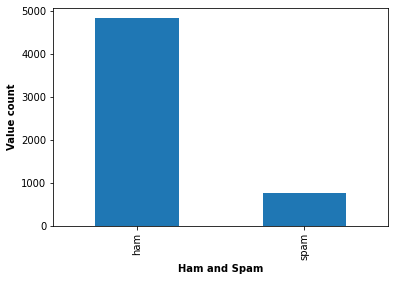

In [3]:
pd.value_counts(spam_ham_sms['labels']).plot.bar()
plt.ylabel("Value count", weight='bold')
plt.xlabel("Ham and Spam", weight='bold')
plt.show()

## Using nltk for Lemmatization and Stemming

In [4]:
wordnet = WordNetLemmatizer()

In [10]:
for i in range(len(spam_ham_sms['messages'])):
    capture_words = re.sub('[^a-zA-Z]', ' ', spam_ham_sms['messages'].iloc[i])
    lowering_spliting = capture_words.lower().split()
    remove_word = [wordnet.lemmatize(word) for word in lowering_spliting
             if not word in set(stopwords.words('english'))]

    finalising = ' '.join(remove_word)
    spam_ham_sms['messages'].iloc[i] = finalising

In [ ]:
data = pd.get_dummies(spam_ham_sms, columns=['labels'], drop_first=True)
data.head(3)

,messages,labels_spam
0,go jurong point crazy available bugis n great ...,0
1,ok lar joking wif u oni,0
2,free entry wkly comp win fa cup final tkts st ...,1


### Using Countvectorizer

In [12]:
count_vectorizer = CountVectorizer()
x = count_vectorizer.fit_transform(spam_ham_sms['messages']).toarray()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, spam_ham_sms['labels'],test_size=0.2, random_state=0)

In [16]:
naive_bayes_classifer = MultinomialNB()
naive_bayes_classifer.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
y_pred = naive_bayes_classifer.predict(x_test)

0.9766816143497757


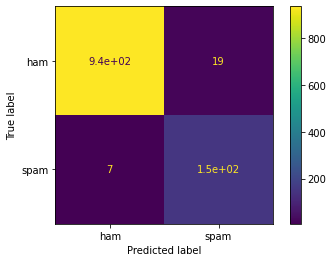

In [18]:
plot_confusion_matrix(naive_bayes_classifer, x_test, y_test)
print(accuracy_score(y_test, y_pred))

### Using Count Vectorizer with para=max_feature

In [67]:
count_vectorizer2 = CountVectorizer(max_features = 3000)

In [68]:
x2 = count_vectorizer2.fit_transform(spam_ham_sms['messages']).toarray()

In [69]:
x_train2, x_test_2, y_train2, y_test_2 = train_test_split(x2, spam_ham_sms['labels'], test_size=0.2, random_state=0)

In [70]:
naive_bayes_classifer_2 = MultinomialNB()
naive_bayes_classifer_2.fit(x_train2, y_train2)
y_pred2 = naive_bayes_classifer_2.predict(x_test_2)

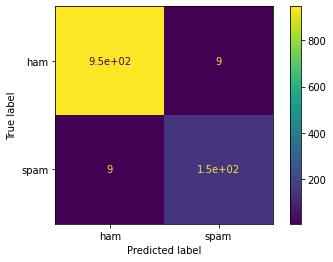

In [71]:
plot_confusion_matrix(naive_bayes_classifer_2, x_test_2, y_test_2)

In [61]:
accuracy_score(y_test_2, y_pred2)

0.9838565022421525

### Using Tfidf

In [30]:
cv = TfidfVectorizer()
x3 = cv.fit_transform(spam_ham_sms['messages']).toarray()

In [31]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x3, spam_ham_sms['labels'], test_size=0.2, random_state=0)

In [32]:
naive_bayes_classifer_3 = MultinomialNB()
naive_bayes_classifer_3.fit(x_train_3, y_train_3)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
y_pred3 = naive_bayes_classifer_3.predict(x_test_3)

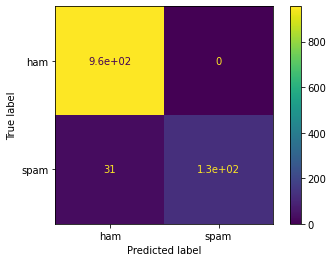

In [34]:
plot_confusion_matrix(naive_bayes_classifer_3, x_test_3, y_test_3);

In [35]:
accuracy_score(y_pred3, y_test_3)

0.9721973094170404

### Precsion and recall

In [ ]:
average_precision_1 = average_precision_score(y_test, y_pred)
recall_score_1 = recall_score(y_test, y_pred)
average_precision_2 = average_precision_score(y_test_2, y_pred2)
recall_score_2 = recall_score(y_test_2, y_pred2)
average_precision_3 = average_precision_score(y_test_3, y_pred3)
recall_score_3 = recall_score(y_test_3, y_pred3)

In [ ]:
print(average_precision_1);print(recall_score_1);print()
print(average_precision_2);print(recall_score_2);print()
print(average_precision_3);print(recall_score_3)

## Finalizing...

In [85]:
# count_vectorizer2.get_feature_names()
feature_df = pd.DataFrame(x2, columns=count_vectorizer2.get_feature_names())
feature_df.head(4)

,aah,aathi,abi,abiola,able,abt,abta,ac,acc,accept,access,accident,accidentally,accordingly,account,ache,across,action,activate,activity,actually,ad,add,added,addicted,addie,address,admirer,adore,adult,advance,advice,advise,ae,affair,affection,afraid,aft,afternoon,aftr,...,wx,wylie,xavier,xchat,xh,xmas,xuhui,xx,xxx,xxxx,xxxxxxx,xxxxxxxxx,xy,ya,yahoo,yan,yar,yay,yeah,year,yeh,yep,yer,yes,yest,yesterday,yet,yetunde,yijue,ym,yo,yoga,yogasana,yor,yr,yummy,yun,yuo,yup,zed
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
spam_ham_sms.head(1)

,labels,messages
0,ham,go jurong point crazy available bugis n great ...


In [91]:
feature_df['labels'] = spam_ham_sms['labels']

In [92]:
feature_df.head(3)

,aah,aathi,abi,abiola,able,abt,abta,ac,acc,accept,access,accident,accidentally,accordingly,account,ache,across,action,activate,activity,actually,ad,add,added,addicted,addie,address,admirer,adore,adult,advance,advice,advise,ae,affair,affection,afraid,aft,afternoon,aftr,...,wylie,xavier,xchat,xh,xmas,xuhui,xx,xxx,xxxx,xxxxxxx,xxxxxxxxx,xy,ya,yahoo,yan,yar,yay,yeah,year,yeh,yep,yer,yes,yest,yesterday,yet,yetunde,yijue,ym,yo,yoga,yogasana,yor,yr,yummy,yun,yuo,yup,zed,labels
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ham
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,ham
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,spam


In [104]:
model = MultinomialNB()
model.fit(feature_df.iloc[:, :-1], feature_df.iloc[:, -1])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
import pickle

In [ ]:
filename = 'spam_model.model'
pickle.dump(naive_bayes_classifer_2, open(filename, 'wb'))